# This notebook trains a logistic regression model from the 2014-2018 racing results to predict the top 10 in general classification at Tour de France

This is to test if the limited number of features we got from 2018 are of any good.

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [238]:
df_X = pd.read_csv('E:\cycling\cycling\data\X.csv',index_col='Rider',encoding='iso-8859-1')
df_y = pd.read_csv('E:\cycling\cycling\data\y.csv',index_col='Rider',encoding='iso-8859-1')

In [239]:
df_X

,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine
Rider,,,,,,,,,,,
BARDET Romain,55.0,703.0,1,3,15,566,40,0.0,1.0,4.0,153.0
CHEREL Mikael,317.0,195.0,0,0,5,151,47,0.0,0.0,0.0,18.0
GASTAUER Ben,787.0,67.0,0,1,3,94,38,0.0,0.0,0.0,5.0
KADRI Blel,431.0,140.0,0,0,0,5,22,0.0,0.0,0.0,5.0
MINARD Sébastien,495.0,121.0,0,0,1,121,41,0.0,0.0,0.0,5.0
PERAUD Jean-Christophe,72.0,586.0,2,5,13,640,44,0.0,0.0,0.0,5.0
RIBLON Christophe,96.0,491.0,0,0,0,44,28,0.0,0.0,0.0,0.0
FUGLSANG Jakob,47.0,753.0,0,1,7,390,41,0.0,0.0,1.0,70.0
GRIVKO Andriy,102.0,466.0,0,0,1,55,42,0.0,0.0,1.0,5.0


In [231]:
df_y.head()

,tdf_top10
Rider,
BARDET Romain,1
CHEREL Mikael,0
DUMOULIN Samuel,0
GASTAUER Ben,0
KADRI Blel,0


In [233]:
kMax = 10
cost=[]
for k in range(1,kMax+1):
    # run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

    cost.append(kmeans.inertia_)

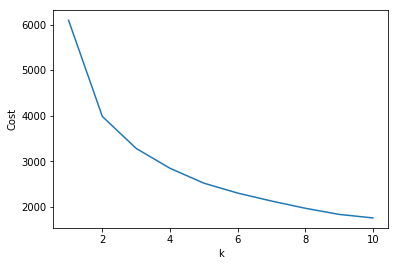

In [234]:
plt.plot(range(1, kMax+1),cost)
plt.xlabel('k')
plt.ylabel('Cost')
plt.show()

In [29]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

# add clustering labels
df_X.insert(0, 'Cluster Labels', kmeans.labels_)

In [30]:
df_X

,Cluster Labels,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine
Rider,,,,,,,,,,,,
BARDET Romain,3,55.0,703.0,1,3,15,566,40,0.0,1.0,4.0,153.0
CHEREL Mikael,0,317.0,195.0,0,0,5,151,47,0.0,0.0,0.0,18.0
GASTAUER Ben,2,787.0,67.0,0,1,3,94,38,0.0,0.0,0.0,5.0
KADRI Blel,0,431.0,140.0,0,0,0,5,22,0.0,0.0,0.0,5.0
MINARD Sébastien,0,495.0,121.0,0,0,1,121,41,0.0,0.0,0.0,5.0
PERAUD Jean-Christophe,3,72.0,586.0,2,5,13,640,44,0.0,0.0,0.0,5.0
RIBLON Christophe,3,96.0,491.0,0,0,0,44,28,0.0,0.0,0.0,0.0
FUGLSANG Jakob,3,47.0,753.0,0,1,7,390,41,0.0,0.0,1.0,70.0
GRIVKO Andriy,3,102.0,466.0,0,0,1,55,42,0.0,0.0,1.0,5.0


In [31]:
df_X.groupby('Cluster Labels').count()

,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine
Cluster Labels,,,,,,,,,,,
0,224,224,224,224,224,224,224,224,224,224,224
1,66,66,66,66,66,66,66,66,66,66,66
2,80,80,80,80,80,80,80,80,80,80,80
3,123,123,123,123,123,123,123,123,123,123,123
4,15,15,15,15,15,15,15,15,15,15,15


In [32]:
df_X.loc[df_X['Cluster Labels'] == 0, :]

,Cluster Labels,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine
Rider,,,,,,,,,,,,
CHEREL Mikael,0,317.0,195.0,0,0,5,151,47,0.0,0.0,0.0,18.0
KADRI Blel,0,431.0,140.0,0,0,0,5,22,0.0,0.0,0.0,5.0
MINARD Sébastien,0,495.0,121.0,0,0,1,121,41,0.0,0.0,0.0,5.0
IGLINSKIY Maxim,0,146.0,390.0,0,1,5,63,36,0.0,0.0,0.0,0.0
KRUIJSWIJK Steven,0,476.0,127.0,0,0,2,71,32,0.0,0.0,0.0,9.0
LEEZER Tom,0,272.0,232.0,0,0,1,30,28,0.0,0.0,0.0,5.0
TANKINK Bram,0,521.0,116.0,0,0,3,121,36,0.0,0.0,1.0,6.0
TEN DAM Laurens,0,170.0,358.0,0,0,1,135,36,0.0,0.0,0.0,48.0
WYNANTS Maarten,0,284.0,219.0,0,0,1,65,30,0.0,0.0,0.0,0.0


In [14]:
df_X.loc[df_X['Cluster Labels'] == 1, :]

,Cluster Labels,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine
Rider,,,,,,,,,,,,
MOLLEMA Bauke,1,13.0,1357.0,1,6,15,630,37,0.0,3.0,5.0,220.0
VAN AVERMAET Greg,1,15.0,1311.0,0,3,9,455,41,0.0,0.0,0.0,5.0
VAN GARDEREN Tejay,1,26.0,1043.0,1,4,9,479,30,0.0,0.0,2.0,51.0
DEMARE Arnaud,1,25.0,1056.0,9,14,24,961,51,0.0,0.0,1.0,1.0
KWIATKOWSKI Michal,1,30.0,995.0,8,18,23,1172,49,0.0,0.0,0.0,0.0
MARTIN Tony,1,14.0,1320.0,7,9,15,798,55,2.0,2.0,4.0,316.0
TERPSTRA Niki,1,38.0,821.0,4,6,16,1174,42,0.0,0.0,0.0,0.0
DEGENKOLB John,1,20.0,1166.0,5,18,22,1004,45,0.0,1.0,1.0,18.0
KRISTOFF Alexander,1,19.0,1192.0,9,11,23,996,55,0.0,0.0,2.0,20.0


In [33]:
df_X.loc[df_X['Cluster Labels'] == 2, :]

,Cluster Labels,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine
Rider,,,,,,,,,,,,
GASTAUER Ben,2,787.0,67.0,0,1,3,94,38,0.0,0.0,0.0,5.0
GRUZDEV Dmitriy,2,763.0,69.0,1,2,2,65,27,0.0,0.0,0.0,5.0
VANOTTI Alessandro,2,964.0,46.0,0,0,0,15,27,0.0,0.0,0.0,5.0
MARINO Jean-Marc,2,1134.0,33.0,0,0,1,29,37,0.0,0.0,0.0,5.0
SABATINI Fabio,2,598.0,98.0,0,0,2,10,27,0.0,0.0,0.0,5.0
BONNET William,2,925.0,50.0,0,0,0,37,34,0.0,0.0,0.0,0.0
PINEAU Cédric,2,662.0,86.0,0,1,1,72,45,0.0,0.0,0.0,5.0
KING Benjamin,2,1484.0,19.0,0,1,2,86,34,0.0,0.0,0.0,5.0
VANSUMMEREN Johan,2,711.0,79.0,0,0,1,32,29,0.0,0.0,0.0,5.0


In [34]:
df_X.loc[df_X['Cluster Labels'] == 3, :]

,Cluster Labels,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine
Rider,,,,,,,,,,,,
BARDET Romain,3,55.0,703.0,1,3,15,566,40,0.0,1.0,4.0,153.0
PERAUD Jean-Christophe,3,72.0,586.0,2,5,13,640,44,0.0,0.0,0.0,5.0
RIBLON Christophe,3,96.0,491.0,0,0,0,44,28,0.0,0.0,0.0,0.0
FUGLSANG Jakob,3,47.0,753.0,0,1,7,390,41,0.0,0.0,1.0,70.0
GRIVKO Andriy,3,102.0,466.0,0,0,1,55,42,0.0,0.0,1.0,5.0
KANGERT Tanel,3,67.0,620.0,0,0,5,127,37,0.0,0.0,1.0,32.0
WESTRA Lieuwe,3,95.0,497.0,2,3,3,145,45,1.0,2.0,2.0,80.0
BOOM Lars,3,49.0,744.0,0,1,4,68,23,0.0,0.0,1.0,3.0
VANMARCKE Sep,3,97.0,491.0,1,3,7,616,33,0.0,0.0,0.0,5.0


In [35]:
df_X.loc[df_X['Cluster Labels'] == 4, :]

,Cluster Labels,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine
Rider,,,,,,,,,,,,
NIBALI Vincenzo,4,1.0,2793.0,1,2,8,464,38,0.0,0.0,4.0,105.0
SAGAN Peter,4,3.0,2673.0,7,18,30,990,50,1.0,3.0,6.0,114.0
NIBALI Vincenzo,4,3.0,2014.0,1,3,6,418,33,0.0,2.0,2.0,100.0
VALVERDE BELMONTE Alejandro,4,1.0,3152.0,7,17,23,1654,37,0.0,2.0,4.0,103.0
DEGENKOLB John,4,6.0,1902.0,5,10,16,953,42,0.0,0.0,1.0,15.0
KRISTOFF Alexander,4,4.0,1964.0,18,24,37,1868,64,1.0,2.0,2.0,68.0
KRISTOFF Alexander,4,2.0,2737.0,8,18,24,1093,47,0.0,1.0,1.0,33.0
FROOME Chris,4,4.0,1973.0,5,7,15,630,31,2.0,3.0,6.0,356.0
SAGAN Peter,4,3.0,2231.0,6,16,26,1470,40,2.0,3.0,3.0,135.0


In [36]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [240]:
from sklearn.model_selection import train_test_split
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size=0.33, random_state=315)

In [241]:
X_train = preprocessing.StandardScaler().fit(df_X_train).transform(df_X_train)
X_test = preprocessing.StandardScaler().fit(df_X_test).transform(df_X_test)
y_train = df_y_train.values
y_test = df_y_test.values

In [218]:
df_X_train

,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine
Rider,,,,,,,,,,,
OLIVEIRA Nelson Filipe Santos Simoes,741.0,73.0,2,2,2,110,42,0.0,0.0,0.0,5.0
JUNGELS Bob,272.0,240.0,4,6,11,425,45,0.0,0.0,2.0,113.0
LUDVIGSSON Tobias,671.0,100.0,1,2,2,43,21,0.0,0.0,0.0,5.0
HAYMAN Mathew,560.0,116.0,1,1,1,310,26,0.0,0.0,0.0,0.0
FUGLSANG Jakob,67.0,703.0,1,7,16,786,39,0.0,2.0,3.0,224.0
HALLER Marco,191.0,336.0,0,0,2,54,32,0.0,0.0,0.0,5.0
ROELANDTS Jürgen,75.0,573.0,0,4,9,282,42,0.0,0.0,0.0,0.0
PREIDLER Georg,420.0,162.0,1,1,3,103,41,0.0,0.0,0.0,5.0
KIRYIENKA Vasil,235.0,270.0,1,2,6,130,34,0.0,0.0,1.0,7.0


In [252]:
clf = LogisticRegression(C=1, solver='liblinear').fit(X_train,y_train)
pred = clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, pred, labels=[1,0])

Confusion matrix, without normalization
[[  6   3]
 [  6 153]]


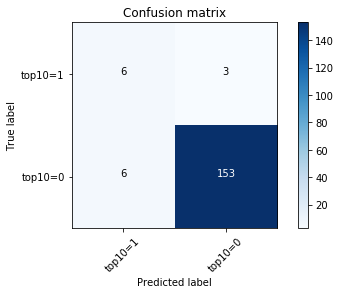

In [253]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['top10=1','top10=0'],normalize= False,  title='Confusion matrix')

In [244]:
df_pred = df_X_test.copy()
df_pred.insert(0,'predicted', pred)
df_pred['actual'] = df_y_test

In [245]:
df_pred[(df_pred['predicted']==1)|(df_pred['actual']==1)]

,predicted,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine,actual
Rider,,,,,,,,,,,,,
CONTADOR VELASCO Alberto,1,7.0,1698.0,0,10,19,881,43,0.0,0.0,3.0,62.0,1
RODRIGUEZ OLIVER Joaquim,1,24.0,1150.0,3,7,12,814,29,0.0,0.0,3.0,100.0,0
YATES Simon,0,72.0,621.0,3,4,8,527,37,0.0,0.0,0.0,48.0,1
BARGUIL Warren,1,128.0,443.0,0,4,10,432,28,0.0,3.0,6.0,223.0,0
BARDET Romain,1,30.0,1162.0,1,6,17,772,32,0.0,2.0,6.0,203.0,1
PINOT Thibaut,1,33.0,1023.0,2,5,17,772,47,1.0,2.0,5.0,254.0,0
QUINTANA ROJAS Nairo Alexander,1,9.0,1560.0,1,7,14,606,31,1.0,2.0,4.0,209.0,1
ARU Fabio,1,50.0,777.0,1,3,12,461,26,0.0,0.0,4.0,135.0,1
THOMAS Geraint,1,37.0,914.0,4,8,18,926,50,0.0,1.0,6.0,213.0,0
